In [31]:
import pandas as pd

In [32]:
%ls data

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 2C12-07DF

 C:\Users\user\Jupyter_python\데이터 퀘스트\6장\data 디렉터리

2020-10-21  오후 03:02    <DIR>          .
2020-10-21  오후 03:02    <DIR>          ..
2020-10-21  오후 02:10    <DIR>          .ipynb_checkpoints
2020-10-21  오후 03:01           963,738 AmesHousing.txt
2020-10-21  오후 02:13           451,708 dc_airbnb.csv
2015-11-06  오전 01:36        15,674,615 listings.csv
               3개 파일          17,090,061 바이트
               3개 디렉터리  80,003,342,336 바이트 남음


In [33]:
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
data.shape

(2930, 82)

- Lot Area: 평방 피트 단위의 로트 크기.
- Overall Qual: 집의 전체 재료와 마감을 평가합니다.
- Overall Cond: 집의 전반적인 상태를 평가합니다.
- Year Built: 원래 건설 날짜.
- Low Qual Fin SF: 저품질 마감 평방 피트 (모든 층).
- Full Bath: 등급 이상의 전체 욕실.
- Fireplaces: 벽난로 수.

In [34]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# 문제 1

- AmesHousing.txt탭 구분 기호 ( \t)를 사용하여 데이터 프레임을 읽고 에 할당합니다 data.
- 에서 첫 번째 1460행을 선택 data하고에 할당합니다 train.
- 에서 나머지 행을 선택 data하고에 할당합니다 test.
- dataframe.info()방법을 사용하여 각 열에 대한 정보를 표시합니다.
- 각 열에 대해 자세히 알아 보려면 데이터 문서 를 읽으십시오 .
- 데이터 문서를 사용하여 예측하려는 대상 열을 결정합니다. 열 이름을에 문자열로 지정합니다 target.

In [35]:
train = data[0:1460]
test = data[1460:]
target = 'SalePrice'

# 문제 2
**데이터를 탐색하려면 데이터 train프레임을 사용하여 플롯을 만듭니다 .**

- 단일 열에 세 개의 산점도를 포함하는 치수가 7 x 15 인 Figure를 만듭니다.
- 첫 번째 플롯은 y 축의 열에 Garage Area대해 x 축의 열을 플로팅해야합니다 SalePrice.
- 두 번째 는 y 축의 열에 Gr Liv Area대해 x 축의 열을 플로팅해야합니다 SalePrice.
- 세 번째 Overall Cond는 x 축의 SalePrice열을 y 축의 열에 대해 플로팅해야합니다 .
- 데이터 문서 에서이 3 개 열에 대해 자세히 알아보세요 .

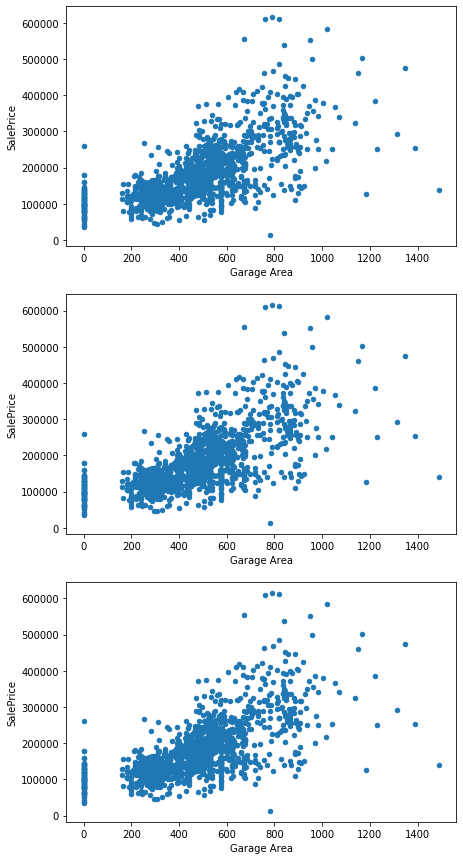

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Garage Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Garage Area", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

In [50]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


# 문제 3

- 선형 회귀 모델을 가져오고 인스턴스화합니다.
- 가격을 예측하기 위해 최상의 기능을 사용하는 선형 회귀 모델을 적합합니다. 기본 인수를 사용합니다 .
- coef_및 intercept_속성을 사용하여 피팅 된 모델의 계수와 절편을 표시 합니다.
- Assign a1to a1 and a0 to a0.

In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
LinearRegression
lr = LinearRegression()

lr.fit(train[['Gr Liv Area']], train['SalePrice'])

LinearRegression()

In [62]:
lr.coef_, lr.intercept_

(array([116.86624683]), 5366.821710056043)

In [61]:
a0 = lr.intercept_
a1 = lr.coef_
a0, a1

(5366.821710056043, array([116.86624683]))

# 문제 4

- 적합 모델을 사용하여 훈련 세트와 테스트 세트 모두에 대해 예측합니다.
- 훈련 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 train_rmse.
- 테스트 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 test_rmse.

In [63]:
from sklearn.metrics import mean_squared_error

In [73]:
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_predictions, test_predictions

(array([198897.32645574, 110078.97886714, 160682.06374328, ...,
        221803.11083385, 242722.16901591, 269835.13827979]),
 array([232905.40428243, 214089.93854327, 272990.52694413, ...,
        118727.08113235, 167694.0385529 , 239099.31536427]))

In [75]:
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_mse, train_mse

(3139849724.9053745, 3139849724.9053745)

In [77]:
import numpy as np

In [79]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_rmse, test_rmse

(56034.362001412796, 57088.25161263909)

# 문제 5 

- 의 열을 사용하여 선형 회귀 모델을 훈련시킵니다 cols.
- 피팅 된 모델을 사용하여 훈련 및 테스트 데이터 세트 모두에 대해 예측합니다.
- 훈련 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 train_rmse_2.
- 테스트 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 test_rmse_2.

In [81]:
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])

LinearRegression()

In [83]:
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_predictions, test_predictions

(array([199117.68850748, 109992.42066597, 160537.02307327, ...,
        221997.00045166, 242891.88227824, 269973.51682441]),
 array([233086.46287359, 214292.74234801, 273125.25877591, ...,
        119040.09670285, 167950.46254271, 239273.21559319]))

In [84]:
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

train_rmse_2, test_rmse_2

(56032.398015258674, 57066.90779448559)